In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

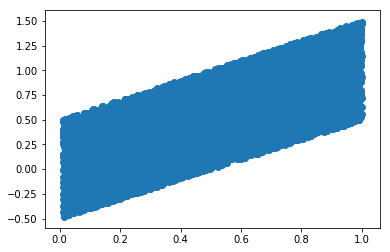

In [2]:
n = 10000
x = np.linspace(0.01, 1, n).reshape(-1, 1)
y = np.linspace(0.01, 1, n)  + np.random.rand(n) - .5


plt.scatter(x,y)

# Assignment 5
# Create and fit a Linear Regression Model
Calculate the Training error and Testing error using sklearn with a .50 split
For error, use mean_squared, but if you want to experiment with other mean errors, please do!

In [190]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)

In [191]:
x_train.shape

(5000, 1)

In [192]:
model1 = LinearRegression()
model1.fit(x_train, y_train)
model1.coef_, model1.intercept_ #creates coeffiecient for the training data

(array([ 0.99862022]), 0.0038154325011381385)

In [193]:
model2 = LinearRegression()
model2.fit(x_test, y_test)
model2.coef_, model2.intercept_ #creates coeffiecient for the test data

(array([ 0.9987003]), -0.0070324894083376721)

The train and test data  slightly differ. 

In [194]:
mean_squared_error(y_train, np.dot(x_train, model1.coef_) + model1.intercept_)

0.084213317203655103

In [195]:
mean_squared_error(y_test, np.dot(x_test, model2.coef_) + model2.intercept_)

0.083856380005553732

In [196]:
model1.score(x_train, y_train) #R^2 score for train

0.49236174332299432

In [197]:
model2.score(x_test, y_test) #R^2 score for test

0.49214556166297085

As exspected the test model's MSE is slightly higher than the train model.

# 2. Repeat #1 for a Ridge Regression

In [9]:
model3 = Ridge(alpha=5.0)
model3.fit(x_train, y_train)
model3.coef_, model3.intercept_ #creates ridge coeffiecient for the training data

(array([ 0.97583319]), 0.010657247952896742)

In [10]:
model4 = Ridge(alpha=5.0)
model4.fit(x_test, y_test)
model4.coef_, model4.intercept_ #creates ridge coeffiecient for the test data

(array([ 0.99682558]), -0.0013332772819047434)

In [11]:
mean_squared_error(y_train, np.dot(x_train, model3.coef_) + model3.intercept_)

0.085715902908318514

In [12]:
mean_squared_error(y_test, np.dot(x_test, model4.coef_) + model4.intercept_)

0.082417280155940603

Again the ridge test LSE was slightly higher. 

# 3. Vary the split size from .01 to .99 with at least 10 values (the more the merrier!). Plot the resulting Training error and Testing error vs. split size. Create separate plots for Linear and Ridg

`train_size` should be values in `(.001, .01, .1, .2, .4, .6, .8, .9)`

Linear Regression Model 1 (Split .001)

In [13]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, train_size=.001)

C:\Users\Pat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [14]:
model3_1 = LinearRegression()
model3_1.fit(x_train1, y_train1)
model3_1.coef_, model3_1.intercept_ #creates coeffiecient for the training data

(array([ 1.42265594]), -0.32428169328590922)

In [15]:
model3_2 = LinearRegression()
model3_2.fit(x_test1, y_test1)
model3_2.coef_, model3_2.intercept_ 

(array([ 0.99831616]), -0.0013449365667306257)

In [16]:
mean_squared_error(y_train1, np.dot(x_train1, model3_1.coef_) + model3_1.intercept_)

0.087050912364087435

In [17]:
mean_squared_error(y_test1, np.dot(x_test1, model3_1.coef_) + model3_1.intercept_)

0.11056379486137334

Ridge Regression Model 1 (Split .001)

In [18]:
model3_3 = Ridge(alpha=2.0)
model3_3.fit(x_train1, y_train1)
model3_3.coef_, model3_3.intercept_ #creates coeffiecient for the training data

(array([ 0.32263352]), 0.28016428831600121)

In [19]:
model3_4 = Ridge(alpha=2.0)
model3_4.fit(x_test1, y_test1)
model3_4.coef_, model3_4.intercept_ #creates coeffiecient for the test data

(array([ 0.9958762]), -0.00011286784706554531)

In [20]:
mean_squared_error(y_train1, np.dot(x_train1, model3_3.coef_) + model3_3.intercept_)

0.15803173358513656

In [21]:
mean_squared_error(y_test1, np.dot(x_test1, model3_4.coef_) + model3_4.intercept_)

0.084042919098781269

Text(0,0.5,'Y')

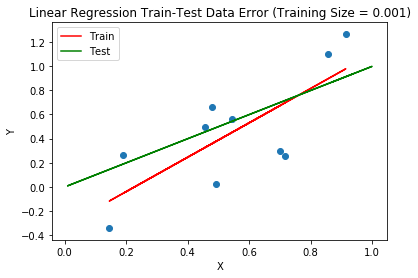

In [22]:
plt.scatter(x_train1, y_train1)
plt.plot(x_train1, np.dot(x_train1, model3_1.coef_) + model3_1.intercept_, color = 'r', label='Train')
plt.plot(x_test1, np.dot(x_test1, model3_2.coef_) + model3_2.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Linear Regression Train-Test Data Error (Training Size = 0.001)")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

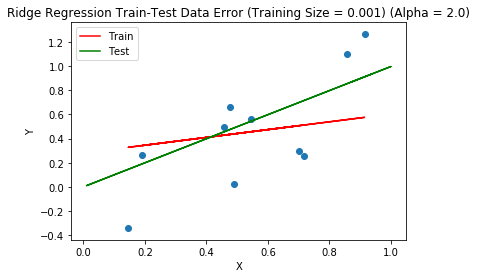

In [23]:
plt.scatter(x_train1, y_train1)
plt.plot(x_train1, np.dot(x_train1, model3_3.coef_) + model3_3.intercept_, color = 'r', label='Train')
plt.plot(x_test1, np.dot(x_test1, model3_4.coef_) + model3_4.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Ridge Regression Train-Test Data Error (Training Size = 0.001) (Alpha = 2.0)")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

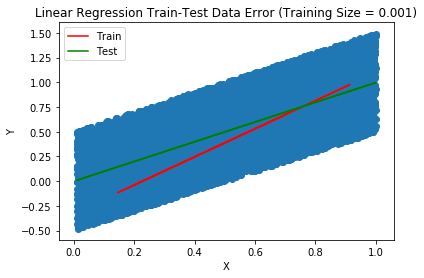

In [24]:
plt.scatter(x, y)
plt.plot(x_train1, np.dot(x_train1, model3_1.coef_) + model3_1.intercept_, color = 'r', label='Train')
plt.plot(x_test1, np.dot(x_test1, model3_2.coef_) + model3_2.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Linear Regression Train-Test Data Error (Training Size = 0.001)")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

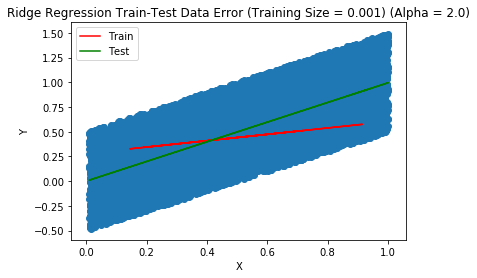

In [25]:
plt.scatter(x, y)
plt.plot(x_train1, np.dot(x_train1, model3_3.coef_) + model3_3.intercept_, color = 'r', label='Train')
plt.plot(x_test1, np.dot(x_test1, model3_4.coef_) + model3_4.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Ridge Regression Train-Test Data Error (Training Size = 0.001) (Alpha = 2.0)")
plt.xlabel("X")
plt.ylabel("Y")

Interesting result in this ridge regression graph. I believe the reason whybthe red "train" line is so flat is because the alpha score of 2.0 stiffened the slope that corresponded to only 10 actual data points. The green test regression line did not stiffen must because it corresponds to 9990 actual data points. 

In [26]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, train_size=.01)

C:\Users\Pat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [27]:
model3_5 = LinearRegression()
model3_5.fit(x_train2, y_train2)
model3_5.coef_, model3_5.intercept_

(array([ 0.98433827]), 0.00022439424590225965)

In [28]:
model3_6 = LinearRegression()
model3_6.fit(x_test2, y_test2)
model3_6.coef_, model3_6.intercept_ 

(array([ 0.9987274]), -0.0015853055875985067)

In [29]:
mean_squared_error(y_train2, np.dot(x_train2, model3_5.coef_) + model3_5.intercept_)

0.084927926157218683

In [30]:
mean_squared_error(y_test2, np.dot(x_test2, model3_6.coef_) + model3_6.intercept_)

0.084054828646442856

Ridge Regression (0.01 Split) 

In [31]:
model3_7 = Ridge(alpha=2.0)
model3_7.fit(x_train2, y_train2)
model3_7.coef_, model3_7.intercept_

(array([ 0.79004484]), 0.10172847975822646)

In [32]:
model3_8 = Ridge(alpha=2.0)
model3_8.fit(x_test2, y_test2)
model3_8.coef_, model3_8.intercept_

(array([ 0.99626369]), -0.00034156483030589602)

In [33]:
mean_squared_error(y_train2, np.dot(x_train2, model3_7.coef_) + model3_7.intercept_)

0.08799793668683982

In [34]:
mean_squared_error(y_test2, np.dot(x_test2, model3_8.coef_) + model3_8.intercept_)

0.08405532450635482

Text(0,0.5,'Y')

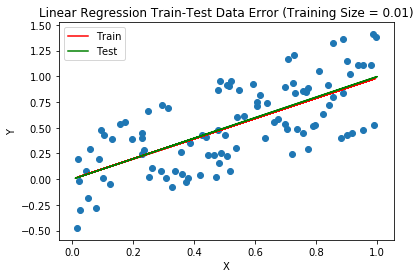

In [35]:
plt.scatter(x_train2, y_train2)
plt.plot(x_train2, np.dot(x_train2, model3_5.coef_) + model3_5.intercept_, color = 'r', label='Train')
plt.plot(x_test2, np.dot(x_test2, model3_6.coef_) + model3_6.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Linear Regression Train-Test Data Error (Training Size = 0.01)")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

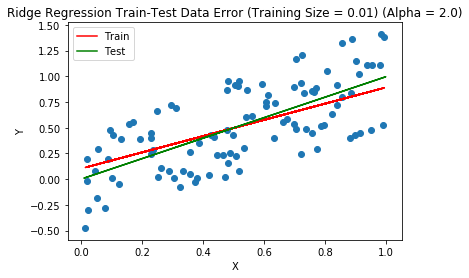

In [36]:
plt.scatter(x_train2, y_train2)
plt.plot(x_train2, np.dot(x_train2, model3_7.coef_) + model3_7.intercept_, color = 'r', label='Train')
plt.plot(x_test2, np.dot(x_test2, model3_8.coef_) + model3_8.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Ridge Regression Train-Test Data Error (Training Size = 0.01) (Alpha = 2.0)")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

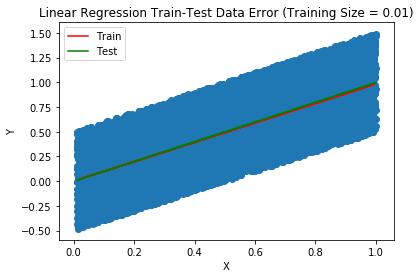

In [37]:
plt.scatter(x, y)
plt.plot(x_train2, np.dot(x_train2, model3_5.coef_) + model3_5.intercept_, color = 'r', label='Train')
plt.plot(x_test2, np.dot(x_test2, model3_6.coef_) + model3_6.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Linear Regression Train-Test Data Error (Training Size = 0.01)")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

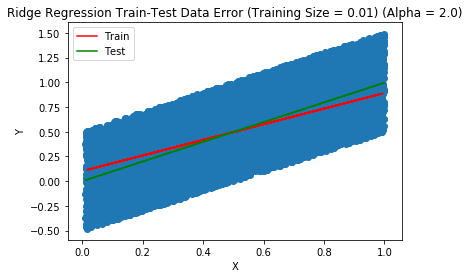

In [38]:
plt.scatter(x, y)
plt.plot(x_train2, np.dot(x_train2, model3_7.coef_) + model3_7.intercept_, color = 'r', label='Train')
plt.plot(x_test2, np.dot(x_test2, model3_8.coef_) + model3_8.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Ridge Regression Train-Test Data Error (Training Size = 0.01) (Alpha = 2.0)")
plt.xlabel("X")
plt.ylabel("Y")

Linear Regression (Train Split = 0.1)

In [39]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y, train_size=.1)

C:\Users\Pat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [40]:
model4_1 = LinearRegression()
model4_1.fit(x_train3, y_train3)
model4_1.coef_, model4_1.intercept_

(array([ 1.01972453]), -0.018998939351872968)

In [41]:
model4_2 = LinearRegression()
model4_2.fit(x_test3, y_test3)
model4_2.coef_, model4_2.intercept_ 

(array([ 0.99624315]), 0.00039025099819411935)

In [42]:
mean_squared_error(y_train3, np.dot(x_train3, model4_1.coef_) + model4_1.intercept_)

0.085215646340557533

In [43]:
mean_squared_error(y_test3, np.dot(x_test3, model4_1.coef_) + model4_1.intercept_)

0.084027375782850994

Ridge Regression (Split = 0.1)

In [44]:
model4_3 = Ridge(alpha=2.0)
model4_3.fit(x_train3, y_train3)
model4_3.coef_, model4_3.intercept_

(array([ 0.99406932]), -0.0063159686026660888)

In [45]:
model4_4 = Ridge(alpha=2.0)
model4_4.fit(x_test3, y_test3)
model4_4.coef_, model4_4.intercept_

(array([ 0.9935553]), 0.0017507933005149745)

In [46]:
mean_squared_error(y_train3, np.dot(x_train3, model4_3.coef_) + model4_3.intercept_)

0.085266652445527086

In [47]:
mean_squared_error(y_test3, np.dot(x_test3, model4_4.coef_) + model4_4.intercept_)

0.083926377121486165

Text(0,0.5,'Y')

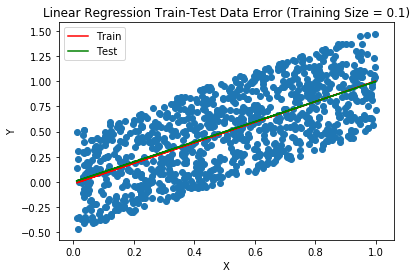

In [48]:
plt.scatter(x_train3, y_train3)
plt.plot(x_train3, np.dot(x_train3, model4_1.coef_) + model4_1.intercept_, color = 'r', label='Train')
plt.plot(x_test3, np.dot(x_test3, model4_2.coef_) + model4_2.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Linear Regression Train-Test Data Error (Training Size = 0.1)")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

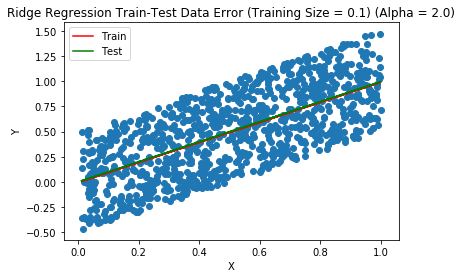

In [49]:
plt.scatter(x_train3, y_train3)
plt.plot(x_train3, np.dot(x_train3, model4_3.coef_) + model4_3.intercept_, color = 'r', label='Train')
plt.plot(x_test3, np.dot(x_test3, model4_4.coef_) + model4_4.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Ridge Regression Train-Test Data Error (Training Size = 0.1) (Alpha = 2.0)")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

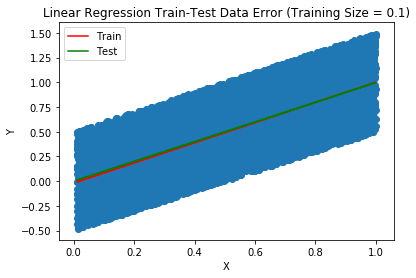

In [50]:
plt.scatter(x, y)
plt.plot(x_train3, np.dot(x_train3, model4_1.coef_) + model4_1.intercept_, color = 'r', label='Train')
plt.plot(x_test3, np.dot(x_test3, model4_2.coef_) + model4_2.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Linear Regression Train-Test Data Error (Training Size = 0.1)")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

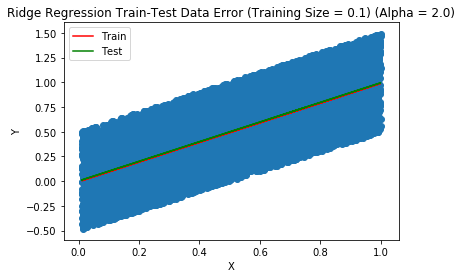

In [51]:
plt.scatter(x, y)
plt.plot(x_train3, np.dot(x_train3, model4_3.coef_) + model4_3.intercept_, color = 'r', label='Train')
plt.plot(x_test3, np.dot(x_test3, model4_4.coef_) + model4_4.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Ridge Regression Train-Test Data Error (Training Size = 0.1) (Alpha = 2.0)")
plt.xlabel("X")
plt.ylabel("Y")

Linear Regression Split =.2

In [52]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(x, y, train_size=.2)

C:\Users\Pat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [53]:
model5_1 = LinearRegression()
model5_1.fit(x_train4, y_train4)
model5_1.coef_, model5_1.intercept_

(array([ 1.01913282]), -0.022449888525036821)

In [54]:
model5_2 = LinearRegression()
model5_2.fit(x_test4, y_test4)
model5_2.coef_, model5_2.intercept_ 

(array([ 0.99313595]), 0.0038626514095220221)

In [55]:
mean_squared_error(y_train4, np.dot(x_train4, model5_1.coef_) + model5_1.intercept_)

0.085117853831882542

In [56]:
mean_squared_error(y_test4, np.dot(x_test4, model5_2.coef_) + model5_2.intercept_)

0.083753981960763627

Ridge Regression

In [57]:
model5_3 = Ridge(alpha=2.0)
model5_3.fit(x_train4, y_train4)
model5_3.coef_, model5_3.intercept_

(array([ 1.00670332]), -0.016279435563784861)

In [58]:
model5_4 = Ridge(alpha=2.0)
model5_4.fit(x_test4, y_test4)
model5_4.coef_, model5_4.intercept_

(array([ 0.99011153]), 0.0053964606851036878)

In [59]:
mean_squared_error(y_train4, np.dot(x_train4, model5_3.coef_) + model5_3.intercept_)

0.085130366654473252

In [60]:
mean_squared_error(y_test4, np.dot(x_test4, model5_4.coef_) + model5_4.intercept_)

0.083754730589961038

Text(0,0.5,'Y')

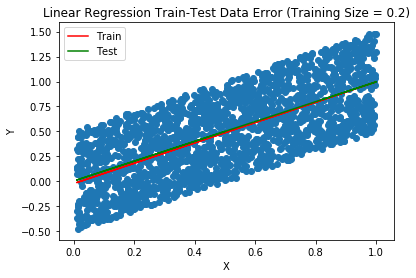

In [61]:
plt.scatter(x_train4, y_train4)
plt.plot(x_train4, np.dot(x_train4, model5_1.coef_) + model5_1.intercept_, color = 'r', label='Train')
plt.plot(x_test4, np.dot(x_test4, model5_2.coef_) + model5_2.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Linear Regression Train-Test Data Error (Training Size = 0.2)")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

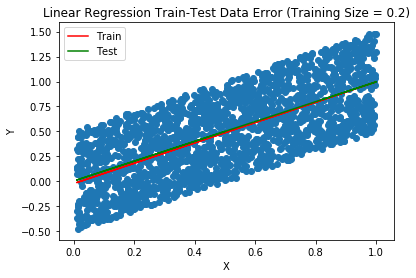

In [62]:
plt.scatter(x_train4, y_train4)
plt.plot(x_train4, np.dot(x_train4, model5_1.coef_) + model5_1.intercept_, color = 'r', label='Train')
plt.plot(x_test4, np.dot(x_test4, model5_2.coef_) + model5_2.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Linear Regression Train-Test Data Error (Training Size = 0.2)")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

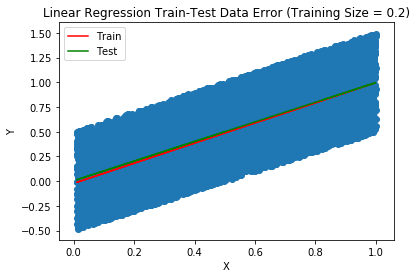

In [63]:
plt.scatter(x, y)
plt.plot(x_train4, np.dot(x_train4, model5_1.coef_) + model5_1.intercept_, color = 'r', label='Train')
plt.plot(x_test4, np.dot(x_test4, model5_2.coef_) + model5_2.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Linear Regression Train-Test Data Error (Training Size = 0.2)")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

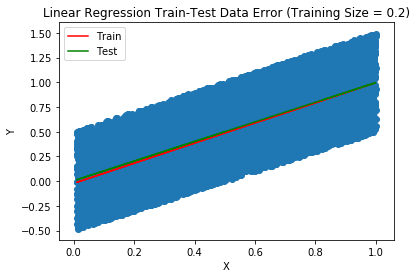

In [64]:
plt.scatter(x, y)
plt.plot(x_train4, np.dot(x_train4, model5_1.coef_) + model5_1.intercept_, color = 'r', label='Train')
plt.plot(x_test4, np.dot(x_test4, model5_2.coef_) + model5_2.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Linear Regression Train-Test Data Error (Training Size = 0.2)")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

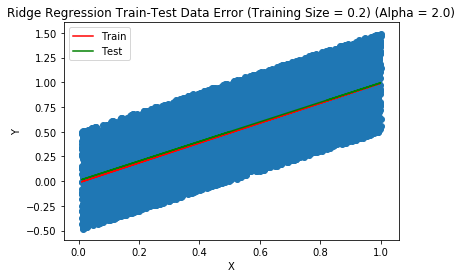

In [65]:
plt.scatter(x, y)
plt.plot(x_train4, np.dot(x_train4, model5_3.coef_) + model5_3.intercept_, color = 'r', label='Train')
plt.plot(x_test4, np.dot(x_test4, model5_4.coef_) + model5_4.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Ridge Regression Train-Test Data Error (Training Size = 0.2) (Alpha = 2.0)")
plt.xlabel("X")
plt.ylabel("Y")

In [66]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(x, y, train_size=.4)

C:\Users\Pat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [67]:
model6_1 = LinearRegression()
model6_1.fit(x_train5, y_train5)
model6_1.coef_, model6_1.intercept_

(array([ 1.00362162]), -0.0031302310378501508)

In [68]:
model6_2 = LinearRegression()
model6_2.fit(x_test5, y_test5)
model6_2.coef_, model6_2.intercept_ 

(array([ 0.99511715]), -0.0004837551819741881)

In [69]:
mean_squared_error(y_train5, np.dot(x_train5, model6_1.coef_) + model6_1.intercept_)

0.083640896320140032

In [70]:
mean_squared_error(y_test5, np.dot(x_test5, model6_2.coef_) + model6_2.intercept_)

0.084342685173530788

Ridge Regression

In [71]:
model6_3 = Ridge(alpha=2.0)
model6_3.fit(x_train5, y_train5)
model6_3.coef_, model6_3.intercept_

(array([ 0.99758765]), -7.3784486982475528e-05)

In [72]:
model6_4 = Ridge(alpha=2.0)
model6_4.fit(x_test5, y_test5)
model6_4.coef_, model6_4.intercept_

(array([ 0.99104081]), 0.0015706121337023538)

In [73]:
mean_squared_error(y_train5, np.dot(x_train5, model6_3.coef_) + model6_3.intercept_)

0.083643906027401571

In [74]:
mean_squared_error(y_test5, np.dot(x_test5, model6_4.coef_) + model6_4.intercept_)

0.084344031780123299

Text(0,0.5,'Y')

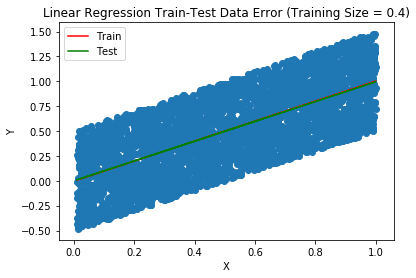

In [75]:
plt.scatter(x_train5, y_train5)
plt.plot(x_train5, np.dot(x_train5, model6_1.coef_) + model6_1.intercept_, color = 'r', label='Train')
plt.plot(x_test5, np.dot(x_test5, model6_2.coef_) + model6_2.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Linear Regression Train-Test Data Error (Training Size = 0.4)")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

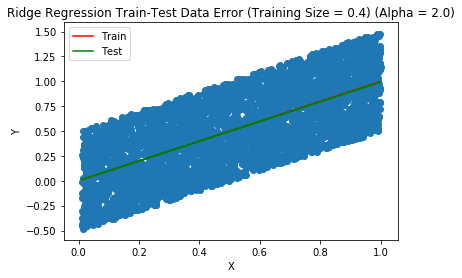

In [76]:
plt.scatter(x_train5, y_train5)
plt.plot(x_train5, np.dot(x_train5, model6_3.coef_) + model6_3.intercept_, color = 'r', label='Train')
plt.plot(x_test5, np.dot(x_test5, model6_4.coef_) + model6_4.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Ridge Regression Train-Test Data Error (Training Size = 0.4) (Alpha = 2.0)")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

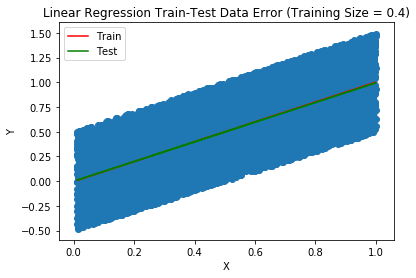

In [77]:
plt.scatter(x, y)
plt.plot(x_train5, np.dot(x_train5, model6_1.coef_) + model6_1.intercept_, color = 'r', label='Train')
plt.plot(x_test5, np.dot(x_test5, model6_2.coef_) + model6_2.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Linear Regression Train-Test Data Error (Training Size = 0.4)")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

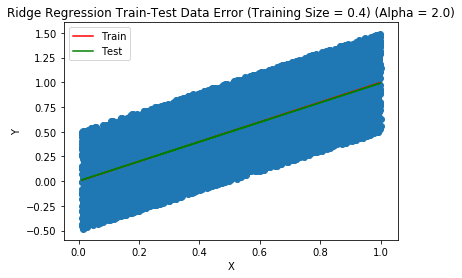

In [78]:
plt.scatter(x, y)
plt.plot(x_train5, np.dot(x_train5, model6_3.coef_) + model6_3.intercept_, color = 'r', label='Train')
plt.plot(x_test5, np.dot(x_test5, model6_4.coef_) + model6_4.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Ridge Regression Train-Test Data Error (Training Size = 0.4) (Alpha = 2.0)")
plt.xlabel("X")
plt.ylabel("Y")

In [150]:
x_train6, x_test6, y_train6, y_test6 = train_test_split(x, y, train_size=.6)

C:\Users\Pat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [151]:
model7_1 = LinearRegression()
model7_1.fit(x_train6, y_train6)
model7_1.coef_, model7_1.intercept_

(array([ 1.00446023]), -0.0037266267223482474)

In [152]:
model7_2 = LinearRegression()
model7_2.fit(x_test6, y_test6)
model7_2.coef_, model7_2.intercept_ 

(array([ 0.98960039]), 0.001695831763054767)

In [153]:
mean_squared_error(y_train6, np.dot(x_train6, model7_1.coef_) + model7_1.intercept_)

0.084847569589442548

In [154]:
mean_squared_error(y_test6, np.dot(x_test6, model7_2.coef_) + model7_2.intercept_)

0.082875401909199176

In [165]:
model7_3 = Ridge(alpha=2.0)
model7_3.fit(x_train6, y_train6)
model7_3.coef_, model7_3.intercept_

(array([ 1.00038626]), -0.0016592785929901988)

In [166]:
model7_4 = Ridge(alpha=2.0)
model7_4.fit(x_test6, y_test6)
model7_4.coef_, model7_4.intercept_

(array([ 0.98356094]), 0.0047235343998062174)

In [167]:
mean_squared_error(y_train6, np.dot(x_train6, model7_3.coef_) + model7_3.intercept_)

0.084848928103949103

In [168]:
mean_squared_error(y_test6, np.dot(x_test6, model7_4.coef_) + model7_4.intercept_)

0.082878371994975483

Text(0,0.5,'Y')

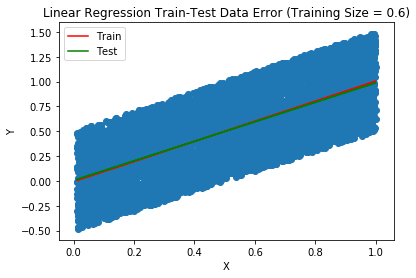

In [88]:
plt.scatter(x_train6, y_train6)
plt.plot(x_train6, np.dot(x_train6, model7_1.coef_) + model7_1.intercept_, color = 'r', label='Train')
plt.plot(x_test6, np.dot(x_test6, model7_2.coef_) + model7_2.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Linear Regression Train-Test Data Error (Training Size = 0.6)")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

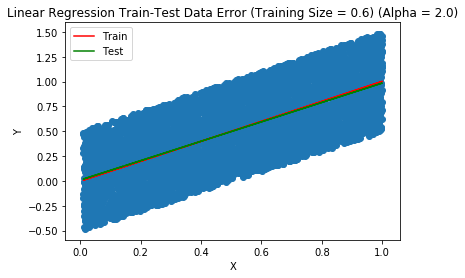

In [89]:
plt.scatter(x_train6, y_train6)
plt.plot(x_train6, np.dot(x_train6, model7_3.coef_) + model7_3.intercept_, color = 'r', label='Train')
plt.plot(x_test6, np.dot(x_test6, model7_4.coef_) + model7_4.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Linear Regression Train-Test Data Error (Training Size = 0.6) (Alpha = 2.0)")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

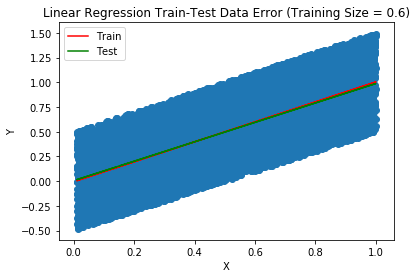

In [90]:
plt.scatter(x, y)
plt.plot(x_train6, np.dot(x_train6, model7_1.coef_) + model7_1.intercept_, color = 'r', label='Train')
plt.plot(x_test6, np.dot(x_test6, model7_2.coef_) + model7_2.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Linear Regression Train-Test Data Error (Training Size = 0.6)")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

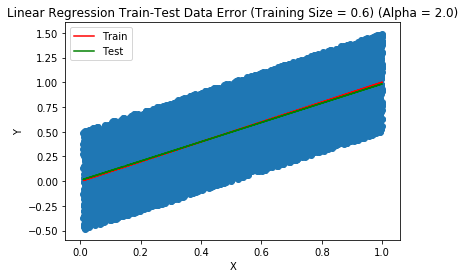

In [91]:
plt.scatter(x, y)
plt.plot(x_train6, np.dot(x_train6, model7_3.coef_) + model7_3.intercept_, color = 'r', label='Train')
plt.plot(x_test6, np.dot(x_test6, model7_4.coef_) + model7_4.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Linear Regression Train-Test Data Error (Training Size = 0.6) (Alpha = 2.0)")
plt.xlabel("X")
plt.ylabel("Y")

In [92]:
x_train7, x_test7, y_train7, y_test7 = train_test_split(x, y, train_size=.8)

C:\Users\Pat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [93]:
model8_1 = LinearRegression()
model8_1.fit(x_train7, y_train7)
model8_1.coef_, model8_1.intercept_

(array([ 0.99641329]), -0.00080043540710372785)

In [94]:
model8_2 = LinearRegression()
model8_2.fit(x_test7, y_test7)
model8_2.coef_, model8_2.intercept_ 

(array([ 1.00724163]), -0.0047104834185258682)

In [95]:
mean_squared_error(y_train7, np.dot(x_train7, model8_1.coef_) + model8_1.intercept_)

0.084217988342385225

In [96]:
mean_squared_error(y_test7, np.dot(x_test7, model8_2.coef_) + model8_2.intercept_)

0.083438633352148961

In [97]:
model8_3 = Ridge(alpha=2.0)
model8_3.fit(x_train7, y_train7)
model8_3.coef_, model8_3.intercept_

(array([ 0.99338482]), 0.00072369049718368217)

In [98]:
model8_4 = Ridge(alpha=2.0)
model8_4.fit(x_test7, y_test7)
model8_4.coef_, model8_4.intercept_

(array([ 0.99486483]), 0.0016256715125738674)

In [182]:
model8_3.score(x_train7, y_train7)

0.49153889620235308

In [183]:
model8_4.score(x_test7, y_test7)

0.49420119828018177

In [99]:
mean_squared_error(y_train7, np.dot(x_train7, model8_3.coef_) + model8_3.intercept_)

0.084218740452059238

In [100]:
mean_squared_error(y_test7, np.dot(x_test7, model8_4.coef_) + model8_4.intercept_)

0.083450946600800338

Text(0,0.5,'Y')

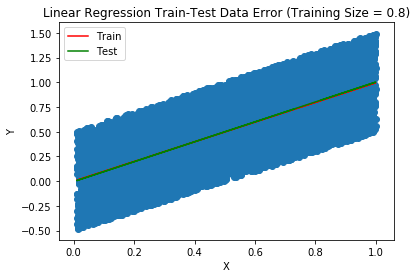

In [101]:
plt.scatter(x_train7, y_train7)
plt.plot(x_train7, np.dot(x_train7, model8_1.coef_) + model8_1.intercept_, color = 'r', label='Train')
plt.plot(x_test7, np.dot(x_test7, model8_2.coef_) + model8_2.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Linear Regression Train-Test Data Error (Training Size = 0.8)")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

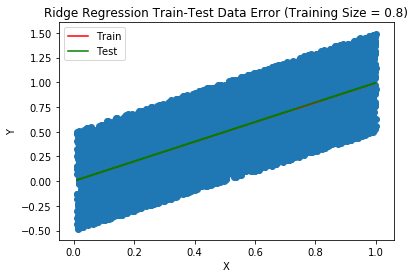

In [102]:
plt.scatter(x_train7, y_train7)
plt.plot(x_train7, np.dot(x_train7, model8_3.coef_) + model8_3.intercept_, color = 'r', label='Train')
plt.plot(x_test7, np.dot(x_test7, model8_4.coef_) + model8_4.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Ridge Regression Train-Test Data Error (Training Size = 0.8)")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

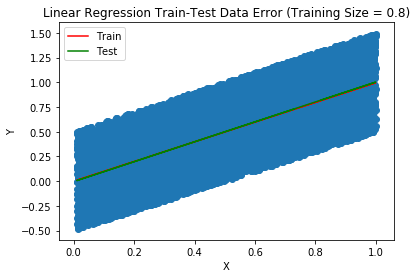

In [103]:
plt.scatter(x, y)
plt.plot(x_train7, np.dot(x_train7, model8_1.coef_) + model8_1.intercept_, color = 'r', label='Train')
plt.plot(x_test7, np.dot(x_test7, model8_2.coef_) + model8_2.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Linear Regression Train-Test Data Error (Training Size = 0.8)")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

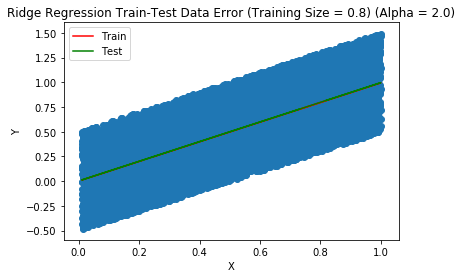

In [104]:
plt.scatter(x, y)
plt.plot(x_train7, np.dot(x_train7, model8_3.coef_) + model8_3.intercept_, color = 'r', label='Train')
plt.plot(x_test7, np.dot(x_test7, model8_4.coef_) + model8_4.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Ridge Regression Train-Test Data Error (Training Size = 0.8) (Alpha = 2.0)")
plt.xlabel("X")
plt.ylabel("Y")

In [105]:
x_train8, x_test8, y_train8, y_test8 = train_test_split(x, y, train_size=.9)

C:\Users\Pat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [106]:
model9_1 = LinearRegression()
model9_1.fit(x_train8, y_train8)
model9_1.coef_, model9_1.intercept_

(array([ 1.00112266]), -0.0027001302718039355)

In [107]:
model9_2 = LinearRegression()
model9_2.fit(x_test8, y_test8)
model9_2.coef_, model9_2.intercept_ 

(array([ 0.97543411]), 0.0088424266878007751)

In [108]:
mean_squared_error(y_train8, np.dot(x_train8, model9_1.coef_) + model9_1.intercept_)

0.084255064830673632

In [109]:
mean_squared_error(y_test8, np.dot(x_test8, model9_2.coef_) + model9_2.intercept_)

0.082294748658713723

In [110]:
model9_3 = Ridge(alpha=2.0)
model9_3.fit(x_train8, y_train8)
model9_3.coef_, model9_3.intercept_

(array([ 0.99840955]), -0.0013310495478654483)

In [111]:
model9_4 = Ridge(alpha=2.0)
model9_4.fit(x_test8, y_test8)
model9_4.coef_, model9_4.intercept_

(array([ 0.95190414]), 0.02080603871655351)

In [112]:
mean_squared_error(y_train8, np.dot(x_train8, model9_3.coef_) + model9_3.intercept_)

0.084255666784051358

In [113]:
mean_squared_error(y_test8, np.dot(x_test8, model9_4.coef_) + model9_4.intercept_)

0.082339545215721247

Text(0,0.5,'Y')

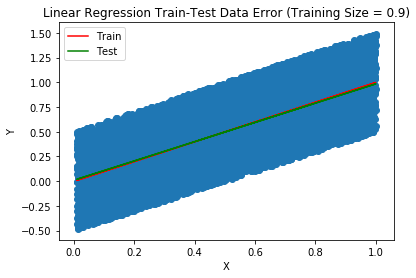

In [114]:
plt.scatter(x_train8, y_train8)
plt.plot(x_train8, np.dot(x_train8, model9_1.coef_) + model9_1.intercept_, color = 'r', label='Train')
plt.plot(x_test8, np.dot(x_test8, model9_2.coef_) + model9_2.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Linear Regression Train-Test Data Error (Training Size = 0.9)")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

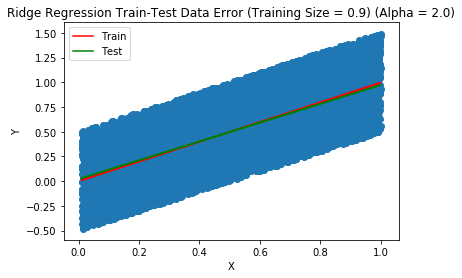

In [115]:
plt.scatter(x_train8, y_train8)
plt.plot(x_train8, np.dot(x_train8, model9_3.coef_) + model9_3.intercept_, color = 'r', label='Train')
plt.plot(x_test8, np.dot(x_test8, model9_4.coef_) + model9_4.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Ridge Regression Train-Test Data Error (Training Size = 0.9) (Alpha = 2.0)")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

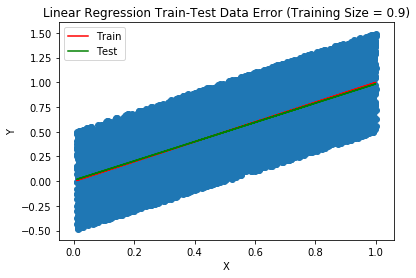

In [116]:
plt.scatter(x, y)
plt.plot(x_train8, np.dot(x_train8, model9_1.coef_) + model9_1.intercept_, color = 'r', label='Train')
plt.plot(x_test8, np.dot(x_test8, model9_2.coef_) + model9_2.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Linear Regression Train-Test Data Error (Training Size = 0.9)")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

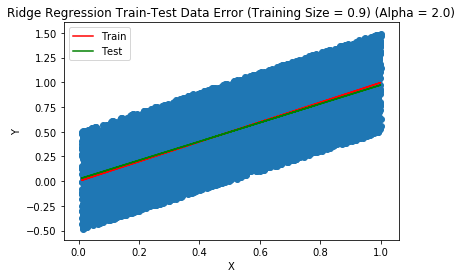

In [117]:
plt.scatter(x, y)
plt.plot(x_train8, np.dot(x_train8, model9_3.coef_) + model9_3.intercept_, color = 'r', label='Train')
plt.plot(x_test8, np.dot(x_test8, model9_4.coef_) + model9_4.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Ridge Regression Train-Test Data Error (Training Size = 0.9) (Alpha = 2.0)")
plt.xlabel("X")
plt.ylabel("Y")

# Model Error Chart and Graphs

In [271]:
df_error = pd.read_csv('C:\JHU_Python\Problemset5_error.csv')

In [119]:
df_error

,Split_Size,Linear_Regression_Train_Error,Linear_Regression_Test_Error,RidgeRegression_TrainError_alpha_2,Ridge_Regression_Test_Error_alpha_2,RidgeRegression_TrainError_alpha_1.1,RidgeRegression_TestError_alpha_1.,Ridge_Regression_Test_Error_alpha_500,RidgeRegression_TrainError_alpha_500
0,0.001,0.105680,0.084562,0.155120,0.082401,0.082648,0.082063,0.103351,0.111481
1,0.010,0.072906,0.082521,0.075948,0.082522,NaN,NaN,NaN,NaN
2,0.100,0.082560,0.082490,0.082605,0.082403,NaN,NaN,NaN,NaN
3,0.200,0.081122,0.082746,0.081134,0.082746,NaN,NaN,NaN,NaN
4,0.400,0.082791,0.082181,0.082794,0.082183,NaN,NaN,NaN,NaN
5,0.600,0.082647,0.082062,0.082649,0.082065,NaN,NaN,NaN,NaN
6,0.800,0.082136,0.083502,0.082137,0.083515,NaN,NaN,NaN,NaN
7,0.900,0.082063,0.085618,0.082063,0.085665,NaN,NaN,NaN,NaN


The above dataframe shows the train-test error rates from testing.

In [222]:
split = df_error.Split_Size
ridge_test_error = df_error.Ridge_Regression_Test_Error_alpha_2

In [223]:
ridge_train_error = df_error.RidgeRegression_TrainError_alpha_2

In [224]:
linear_train = df_error.Linear_Regression_Train_Error

In [225]:
linear_test = df_error.Linear_Regression_Test_Error

Text(0,0.5,'Test Error')

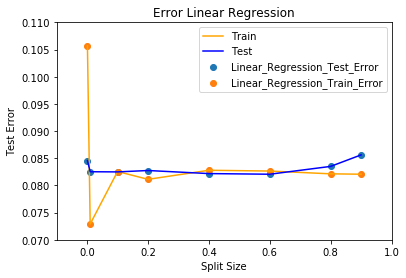

In [227]:
plt.scatter(split,linear_test)
plt.scatter(split,linear_train)
plt.plot(split,linear_train, color='orange', label='Train')
plt.plot(split,linear_test, color='blue', label='Test')
plt.legend()
plt.xlim(-0.1, 1)
plt.ylim(.07, .11)
plt.title("Error Linear Regression")
plt.xlabel("Split Size")
plt.ylabel("Test Error")

Text(0,0.5,'Test Error')

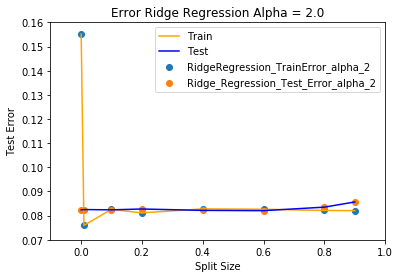

In [231]:
plt.scatter(split,ridge_train_error)
plt.scatter(split,ridge_test_error)
plt.plot(split,ridge_train_error, color='orange', label='Train')
plt.plot(split,ridge_test_error, color='blue', label='Test')
plt.legend()
plt.xlim(-0.1, 1)
plt.ylim(.07, .16)
plt.title("Error Ridge Regression Alpha = 2.0")
plt.xlabel("Split Size")
plt.ylabel("Test Error")

# 4. Chose an ideal split size based on the previous plot for Ridge.¶
Vary the Ridge parameter alpha from 0 to any value you'd like above 1. Plot the Train and Test error. Describe what you see based on the alpha parameter's stiffness.

Based on the results from the above models I am choosing the split size (0.6) because it performed better than any other ridge model at Alpha 2.0 with a ridge training error of 0.0848 and a test error of 0.0828 (Alpha 2.0 was the baseline that I chose in the above models.) I did not reshuffle the data from above.  

In [128]:
model10 = Ridge(alpha=1.1)
model10.fit(x_train6, y_train6)
model10.coef_, model10.intercept_

(array([ 1.0070682]), -0.0048356275861599629)

In [129]:
model11 = Ridge(alpha=1.1)
model11.fit(x_test6, y_test6)
model11.coef_, model11.intercept_

(array([ 0.97904631]), 0.0067077013270827046)

In [130]:
mean_squared_error(y_train6, np.dot(x_train6, model10.coef_) + model10.intercept_)

0.083284157970529793

In [131]:
mean_squared_error(y_test6, np.dot(x_test6, model11.coef_) + model11.intercept_)

0.085195741063990166

Text(0,0.5,'Y')

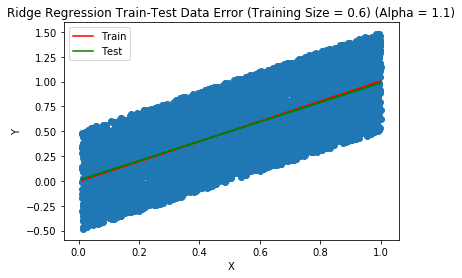

In [132]:
plt.scatter(x_train6, y_train6)
plt.plot(x_train6, np.dot(x_train6, model10.coef_) + model10.intercept_, color = 'r', label='Train')
plt.plot(x_test6, np.dot(x_test6, model11.coef_) + model11.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Ridge Regression Train-Test Data Error (Training Size = 0.6) (Alpha = 1.1)")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

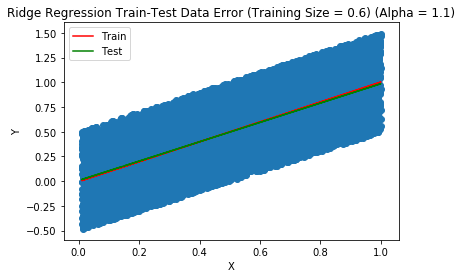

In [133]:
plt.scatter(x, y)
plt.plot(x_train6, np.dot(x_train6, model10.coef_) + model10.intercept_, color = 'r', label='Train')
plt.plot(x_test6, np.dot(x_test6, model11.coef_) + model11.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Ridge Regression Train-Test Data Error (Training Size = 0.6) (Alpha = 1.1)")
plt.xlabel("X")
plt.ylabel("Y")

An alpha parameter of 1.1 did not change the error values very much; in fact they basically stayed exactly the same. Since my sample is a total of 10000 (6000 train - 4000 test) I am going to try to significantly change the error score with a larger alpha score in the next model .   

In [169]:
model30 = Ridge(alpha=1.5)
model30.fit(x_train6, y_train6)
model30.coef_, model30.intercept_

(array([ 1.00140165]), -0.0021745418579381948)

In [170]:
model31 = Ridge(alpha=1.5)
model31.fit(x_test6, y_test6)
model31.coef_, model31.intercept_

(array([ 0.98506388]), 0.0039700786287389933)

In [172]:
mean_squared_error(y_train6, np.dot(x_train6, model30.coef_) + model30.intercept_)

0.084848335305892142

In [173]:
mean_squared_error(y_test6, np.dot(x_test6, model31.coef_) + model31.intercept_)

0.082877077692134121

Text(0,0.5,'Y')

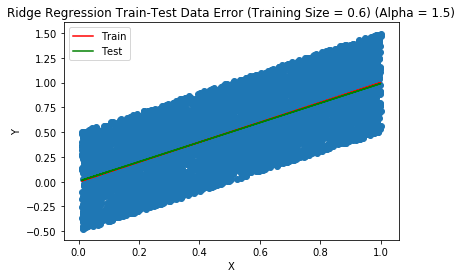

In [175]:
plt.scatter(x_train6, y_train6)
plt.plot(x_train6, np.dot(x_train6, model30.coef_) + model30.intercept_, color = 'r', label='Train')
plt.plot(x_test6, np.dot(x_test6, model31.coef_) + model1.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Ridge Regression Train-Test Data Error (Training Size = 0.6) (Alpha = 1.5)")
plt.xlabel("X")
plt.ylabel("Y")

In [181]:
model30.score(x_train6, y_train6)

0.49323471985350142

In [180]:
model31.score(x_test6, y_test6)

0.49035895828353881

In [134]:
model12 = Ridge(alpha=500)
model12.fit(x_train6, y_train6)
model12.coef_, model12.intercept_

(array([ 0.49979411]), 0.25206892384711316)

In [135]:
model13 = Ridge(alpha=500)
model13.fit(x_test6, y_test6)
model13.coef_, model13.intercept_

(array([ 0.38802099]), 0.30389771943470012)

In [136]:
mean_squared_error(y_train6, np.dot(x_train6, model12.coef_) + model12.intercept_)

0.10450553226687577

In [137]:
mean_squared_error(y_test6, np.dot(x_test6, model13.coef_) + model13.intercept_)

0.11402114632817384

In [184]:
model12.score(x_train6, y_train6)

0.36872983566755857

In [187]:
model13.score(x_test6, y_test6)

0.30915388036248392

Text(0,0.5,'Y')

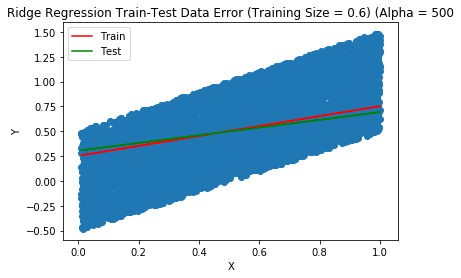

In [138]:
plt.scatter(x_train6, y_train6)
plt.plot(x_train6, np.dot(x_train6, model12.coef_) + model12.intercept_, color = 'r', label='Train')
plt.plot(x_test6, np.dot(x_test6, model13.coef_) + model13.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Ridge Regression Train-Test Data Error (Training Size = 0.6) (Alpha = 500")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

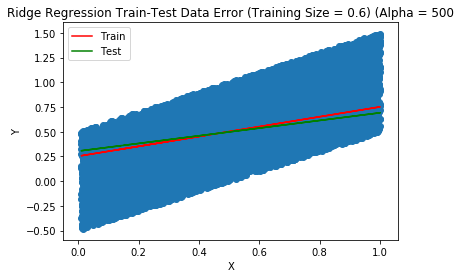

In [139]:
plt.scatter(x, y)
plt.plot(x_train6, np.dot(x_train6, model12.coef_) + model12.intercept_, color = 'r', label='Train')
plt.plot(x_test6, np.dot(x_test6, model13.coef_) + model13.intercept_, color = 'g', label='Test')
plt.legend()
plt.title("Ridge Regression Train-Test Data Error (Training Size = 0.6) (Alpha = 500")
plt.xlabel("X")
plt.ylabel("Y")

In [236]:
df_error

,Split_Size,Linear_Regression_Train_Error,Linear_Regression_Test_Error,RidgeRegression_TrainError_alpha_2,Ridge_Regression_Test_Error_alpha_2,RidgeRegression_TrainError_alpha_1.1,RidgeRegression_TestError_alpha_1.1,Ridge_Regression_Test_Error_alpha_500,RidgeRegression_TrainError_alpha_500,RidgeRegression_TrainError_alpha_1.5,RidgeRegression_TestError_alpha_1.5
0,0.001,0.105680,0.084562,0.155120,0.082401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.010,0.072906,0.082521,0.075948,0.082522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.100,0.082560,0.082490,0.082605,0.082403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.200,0.081122,0.082746,0.081134,0.082746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.400,0.082791,0.082181,0.082794,0.082183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.600,0.082647,0.082062,0.082649,0.082065,0.082648,0.082063,0.103351,0.111481,0.084848,0.082877
6,0.800,0.082136,0.083502,0.082137,0.083515,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.900,0.082063,0.085618,0.082063,0.085665,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [274]:
Train_error1 = df_error.RidgeRegression_TrainError_alpha_1

In [275]:
ridge_test_error1 = df_error.RidgeRegression_TestError_alpha_1

In [276]:
ridge_test_error500 = df_error.Ridge_Regression_Test_Error_alpha_500

In [277]:
ridge_train_error500 = df_error.RidgeRegression_TrainError_alpha_500

In [278]:
ridge_train_error15 = df_error.RidgeRegression_TrainError_alpha_15

In [279]:
ridge_test_error15 = df_error.RidgeRegression_TestError_alpha_15

C:\Users\Pat\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.6, right=0.6
  'left=%s, right=%s') % (left, right))


Text(0,0.5,'Test Error')

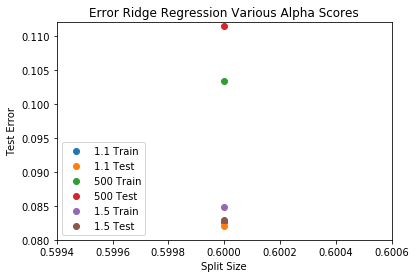

In [284]:
plt.scatter(split,Train_error1, label="1.1 Train")
plt.scatter(split,ridge_test_error1, label="1.1 Test")
plt.scatter(split,ridge_train_error500, label="500 Train" )
plt.scatter(split,ridge_test_error500, label="500 Test")
plt.scatter(split,ridge_train_error15, label="1.5 Train")
plt.scatter(split,ridge_test_error15, label="1.5 Test")
plt.legend(loc='lower left')
plt.xlim(.60, .60)
plt.ylim(.08, .112)
plt.title("Error Ridge Regression Various Alpha Scores")
plt.xlabel("Split Size")
plt.ylabel("Test Error")

The model flattened out dramatically once I increased the alpha score to 500. The error rate increased to 0.103 for training data and 0.111 for test data respectively. I believe the model finally stiffened because the predictions (train and test) had to resist fitting (6000 and 4000 points) respectively. I learned that as I increased the alpha score from 1.1 to 1.5 and finally to 500, that model increasing became worse based on error score and R^2.Additionally, I learned that models have to have the best of both worlds; a vast array of training data and a sufficient sample of test data. Since I received the best results with a 60/40 train-test ratio for the sample I would continue to adjust the alpha parameters to see if I can reduce the error rate.

# Bonus. Either: Generate data with a polynomial shape or use real data that you find on your own. Choose whatever regression model and process you'd like (Ridge, polynomial, etc.) and plot the Train-Test errors vs. any parameter your Model depends on (e.g. alpha, degree, etc.)

In [286]:
df_auto = pd.read_csv('C:\JHU_Python\data\Auto.csv')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [287]:
x1 = df_auto.weight.values.reshape(-1, 1)
y1 = df_auto.mpg

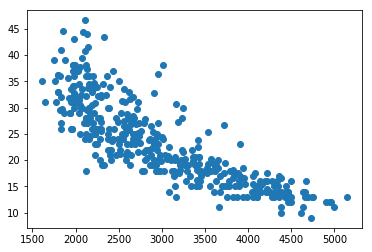

In [288]:
plt.scatter(x1, y1)

In [289]:
linearb = linear_model.LinearRegression()
linearb.fit(x1, y1)
(linearb.coef_, linearb.intercept_)

(array([-0.00767661]), 46.3173991752533)

Text(0,0.5,'MPG')

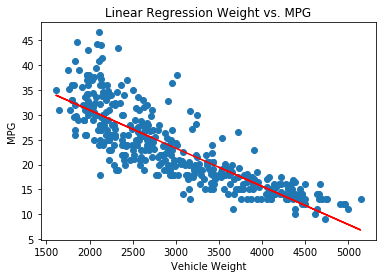

In [290]:
plt.scatter(x1, y1)
plt.plot(x1, x1*linearb.coef_ + linearb.intercept_, c='r')

plt.title("Linear Regression Weight vs. MPG")
plt.xlabel("Vehicle Weight")
plt.ylabel("MPG")

In [291]:
ridgeb = linear_model.Ridge(alpha=100000000)
ridgeb.fit(x1, y1)
(ridgeb.coef_, ridgeb.intercept_)

(array([-0.00568113]), 40.390317508930131)

Text(0.5,0,'Vehicle Weight')

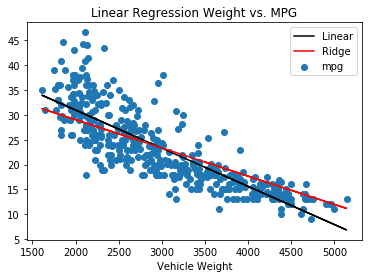

In [292]:
plt.scatter(x1,y1)
plt.plot(x1, x1*linearb.coef_ + linearb.intercept_, c='black', label="Linear")
plt.plot(x1, x1*ridgeb.coef_ + ridgeb.intercept_, c='r', label="Ridge")
plt.legend()
plt.title("Linear Regression Weight vs. MPG")
plt.xlabel("Vehicle Weight")


In [293]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [463]:
x_train10, x_test10, y_train10, y_test10 = train_test_split(x1, y1, train_size=.7)

C:\Users\Pat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [464]:
model1 = LinearRegression()
model1.fit(x_train10, y_train10)
model1.coef_, model1.intercept_

(array([-0.00758241]), 46.201052678094314)

In [465]:
model77 = LinearRegression()
model77.fit(x_test10, y_test10)
model77.coef_, model77.intercept_

(array([-0.00793962]), 46.720426620232104)

In [466]:
mean_squared_error(y_train10, np.dot(x_train10, model1.coef_) + model1.intercept_)

17.986013415203917

In [467]:
mean_squared_error(y_test10, np.dot(x_test10, model77.coef_) + model77.intercept_)

20.509115636183719

In [468]:
model2 = Ridge(alpha=50000000)
model2.fit(x_train10, y_train10)
model2.coef_, model2.intercept_

(array([-0.00611948]), 41.854127732325722)

In [469]:
model222 = Ridge(alpha=500000000)
model222.fit(x_test10, y_test10)
model222.coef_, model222.intercept_

(array([-0.00104217]), 26.251141129548444)

In [470]:
mean_squared_error(y_train10, np.dot(x_train10, model2.coef_) + model2.intercept_)

19.601961709174226

In [471]:
mean_squared_error(y_test10, np.dot(x_test10, model222.coef_) + model222.intercept_)

50.460477536354482

# Polynomial Regression Train/Test

In [472]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(x_train10)
X_test_poly = poly.fit_transform(x_test10)

In [478]:
model100 = LinearRegression()
model100.fit(X_train_poly, y_train10)
model100.coef_, model100.intercept_


(array([  0.00000000e+00,  -1.86177615e-02,   1.71332130e-06]),
 62.570538774120266)

In [479]:
model101 = LinearRegression()
model101.fit(X_test_poly, y_test10)
model101.coef_, model101.intercept_

(array([  0.00000000e+00,  -1.83167688e-02,   1.66225176e-06]),
 61.830308684368418)

In [482]:
polynomial_features = PolynomialFeatures(degree=2)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
pipeline.fit(x_train10, y_train10)


Pipeline(memory=None,
     steps=[('polynomial_features', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [ ]:
sort.x_test10

Text(0.5,0,'Vehicle Weight')

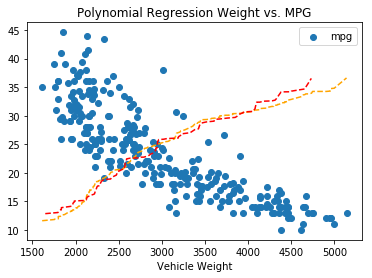

In [506]:
plt.scatter(x_train10, y_train10)
plt.plot(sorted(x_train10), sorted(y_pred),'--', color = 'orange')
plt.plot(sorted(x_test10), sorted(y_pred2),'--', color = 'red')
plt.legend()
plt.title("Polynomial Regression Weight vs. MPG")
plt.xlabel("Vehicle Weight")

In [484]:
regressor = LinearRegression()
regressor2 = LinearRegression()
regressor.fit(X_train_poly, y_train10)
regressor2.fit(X_test_poly, y_test10)
y_pred = regressor2.predict(X_train_poly)
y_pred2 = regressor.predict(X_test_poly)

In [485]:
mean_squared_error(y_train10, y_pred) #error for training the polynomial model 

16.567171545095054

In [486]:
mean_squared_error(y_test10, y_pred2) #error for training the test model

19.683919965524876